# Some useful algorithms 

# Sorting algorithms

The choice of the sorting algorithm depends both on the **size** and the **state** (e.g partially sorted) of the current input dataset. 

For small input datasets, using an advanced algorithm will introduce complexities to the code --> look for a **trade-off**.

- **Bubble sort**: for **small-size dataset**. Easier to understand and implement.

    - **Shell sort**: **Bubble implementation**. for **medium-sized** datasets (up to 6,000 elements). 

    - **Selection sort**: **Bubble implementation**. For **small-medium** datasets. Better average performance than the bubble due to the reduction in the number of exchanges.

- **Inserction sort**:  for **small-size** and **partially sorted** dataset.

- **Merge sort**: **Independent** from the data **state**. **Complex** and for **large datasets**.

## Bubble sorting 

- **Pass 1**: pushing the highest value to the top of the list throught baby steps by comparing adjacent neighbor values. 

- **Pass 2**: pushing the 2nd highest value to the the second top of the list throught baby steps.

- **Pass 3**: ... and so on.

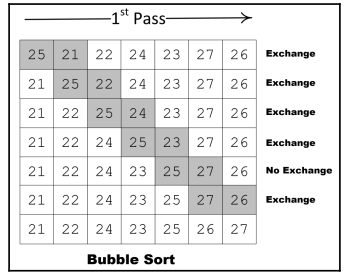

In [73]:
from IPython.display import Image

Image("immages/bubble.png")


In [74]:
sample_list = [25, 21, 22, 24, 23, 27, 26]


def BubbleSort(sorted_list):
    lastElementIndex = len(sorted_list) - 1
    for passNo in range(lastElementIndex, 0, -1):  # obj, start, step
        for idx in range(passNo):
            if sorted_list[idx] > sorted_list[idx + 1]:
                sorted_list[idx], sorted_list[idx + 1] = (
                    sorted_list[idx + 1],
                    sorted_list[idx],
                )
    return sorted_list


BubbleSort(sample_list)


[21, 22, 23, 24, 25, 26, 27]

## Insertion Sort

In each iteration, we remove a data point from the data structure and insert it in the right position.

In the first iteration, we select two data points and sort them. Then, we expand our selection to the third data point by putting it in the right position, then the 4th... and so on.

Is not recommended for large data structures due to its quadratic average performance. 

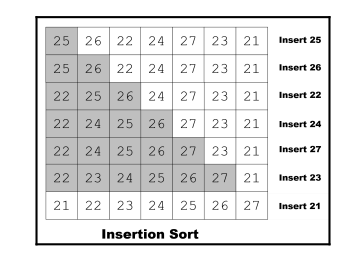

In [75]:
from IPython.display import Image

Image("immages/insertion.png")


In [76]:
sample_list = [25, 21, 22, 24, 23, 27, 26]


def InsertionSort(sorted_list):
    for i in range(1, len(sorted_list)):
        j = i - 1
        element_next = sorted_list[i]
        while (sorted_list[j] > element_next) and (j >= 0):
            sorted_list[j + 1] = sorted_list[j]
            j = j - 1
        sorted_list[j + 1] = element_next
    return sorted_list


InsertionSort(sample_list)


[21, 22, 23, 24, 25, 26, 27]

## Merge Sort

Independent from the data state.

Based on a divide and conquer strategy: 

- First phase (splitting): Dividing the data into two parts recursively, until the size of the data is less than a threshold.

- Second phase (merging): merging and processing until we get the final result. 

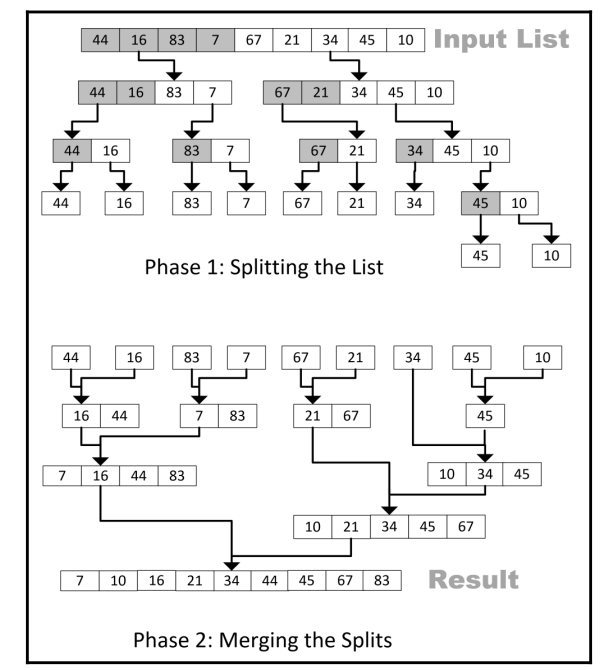

In [77]:
from IPython.display import Image

Image("immages/merge.png")


In [78]:
sample_list = [44, 16, 83, 7, 67, 21, 34, 45, 10]


def MergeSort(sorted_list):

    # splitting
    if len(sorted_list) > 1:
        # half splitting
        mid = len(sorted_list) // 2  # round the result (per difetto)
        left = sorted_list[:mid]
        right = sorted_list[mid:]

        # recursively splitting till len=1
        MergeSort(left)
        MergeSort(right)

        # merging
        a = 0
        b = 0
        c = 0

        while a < len(left) and b < len(right):
            if left[a] < right[b]:
                sorted_list[c] = left[a]
                a = a + 1
            else:
                sorted_list[c] = right[b]
                b = b + 1
            c = c + 1

        while a < len(left):
            sorted_list[c] = left[a]
            a = a + 1
            c = c + 1

        while b < len(right):
            sorted_list[c] = right[b]
            b = b + 1
            c = c + 1
    return sorted_list


MergeSort(sample_list)


[7, 10, 16, 21, 34, 44, 45, 67, 83]

## Shell sort 

Bubble sort implementation.

In pass one, we use elements that are at a fixedgap, eventually sorting a sublist consisting of a pair of data points.

In pass two, we sort sublists containing four data points.

In subsequent passes, the number of data points per sublist keeps increasing and the number of sublists keeps decreasing until we reach one sublist containing the sorted data.

Used for medium-sized datasets(up to 6,000 elements).

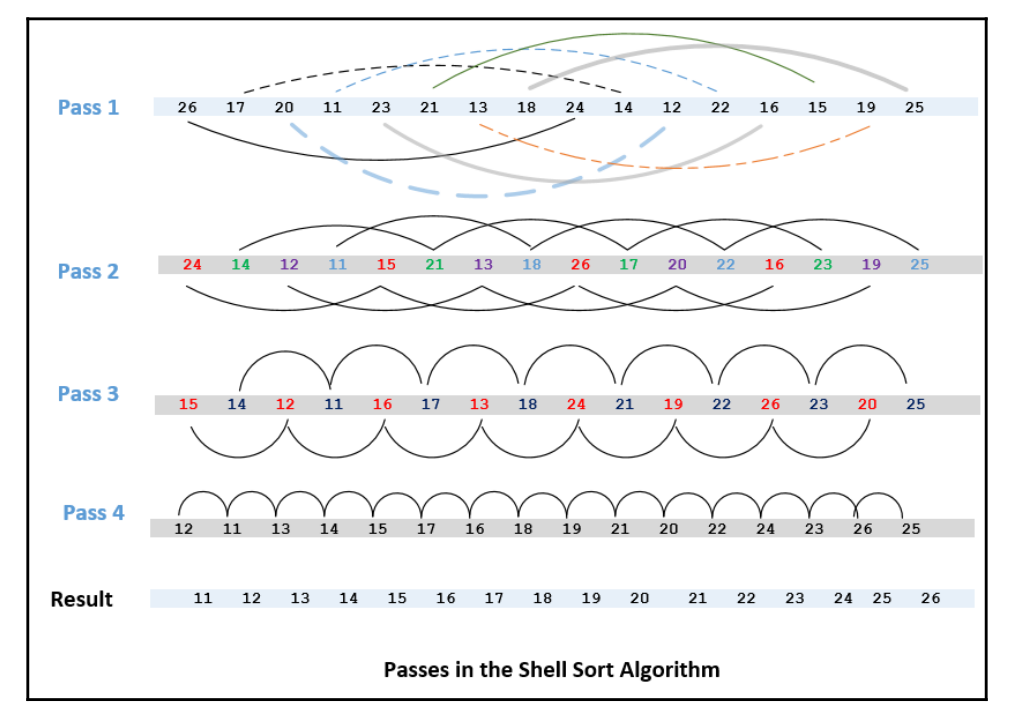

In [79]:
from IPython.display import Image

Image("immages/shell.png")


In [80]:
sample_list = [26, 17, 20, 11, 23, 21, 13, 18, 24, 14, 12, 22, 16, 15, 19, 25]


def ShellSort(sorted_list):
    distance = len(sorted_list) // 2
    while distance > 0:
        for i in range(distance, len(sorted_list)):
            temp = sorted_list[i]
            j = i
            # Sort the sub list for this distance
            while j >= distance and sorted_list[j - distance] > temp:
                sorted_list[j] = sorted_list[j - distance]
                j = j - distance
            sorted_list[j] = temp
        # Reduce the distance for the next element
        distance = distance // 2
    return sorted_list


ShellSort(sample_list)


[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

## Selection sort

Bubble implementation.

Instead of bubbling with baby steps we look for the largest value in each pass for move it toward the top.

After the first pass, the largest value will be at the top.
After the second pass, the second largest value will be next to the top value.
And so on...

Its average performance is better tha bubble due to the reduction in the number of exchanges. 

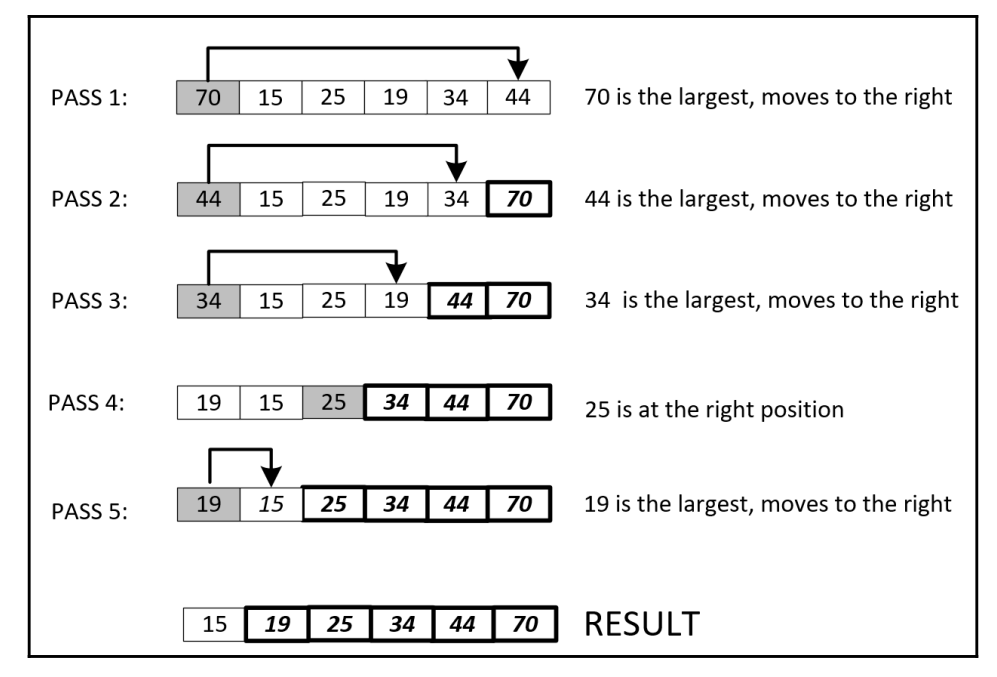

In [81]:
from IPython.display import Image

Image("immages/selection.png")


In [82]:
sample_list = [70, 15, 25, 19, 34, 44]


def SelectionSort(sorted_list):
    for fill_slot in range(len(sorted_list) - 1, 0, -1):
        max_index = 0
        for location in range(1, fill_slot + 1):
            if sorted_list[location] > sorted_list[max_index]:
                max_index = location
        sorted_list[fill_slot], sorted_list[max_index] = (
            sorted_list[max_index],
            sorted_list[fill_slot],
        )
    return sorted_list


SelectionSort(sample_list)


[15, 19, 25, 34, 44, 70]

# Searching Algorithms

- **Linear search**: no sorting required, slowest O(N) runtime.

- **Binary search**: sorting required, O(logN) runtime.

- **Interpolation search**: sorting required, depending on the data distribution: worst O(N) up to best O(log(log N)). 

## Linear Search

Each data point is searched for a match. 

When a match is found, the results are returned.

Very slow due to the exhaustive search but the data does not need to be sorted.

O(N) runtime.

In [83]:
sample_list = [12, 33, 11, 99, 22, 55, 90]


def LinearSearch(obj, item):
    index = 0
    found = False
    # Match the value with each data element
    while index < len(obj) and found is False:
        if obj[index] == item:
            found = True
        else:
            index = index + 1
    return found


print(
    LinearSearch(BubbleSort(sample_list), 12), LinearSearch(BubbleSort(sample_list), 91)
)


True False


# Binary Search

Pre-requisite --> sorted data.

Iteratively divides a list into two parts and keeps track of the lowest and highest indices until it finds the value that we looking for.

O(logN) runtime.

In [84]:
sample_list = [12, 33, 11, 99, 22, 55, 90]


def BinarySearch(obj, item):
    first = 0
    last = len(obj) - 1
    found = False

    while first <= last and not found:
        midpoint = (first + last) // 2
        if obj[midpoint] == item:
            found = True
        else:
            if item < obj[midpoint]:
                last = midpoint - 1
            else:
                first = midpoint + 1
    return found


obj = BubbleSort(sample_list)
print(obj)
print(BinarySearch(obj, 12))
print(BinarySearch(obj, 91))


[11, 12, 22, 33, 55, 90, 99]
True
False


# Interpolation Search

Pre-requisite --> sorted data.

Use the target value to estimate the position of the element in the sorted array.

E.g. --> Assume we want to search for a word(river) the dictionary. 

We will use this information to interpolate and start searching for words starting with r (estimate example of position).

Depending on the data distribution: worst-case performance O(N) (unevenly distributed) up to best performance O(log(log N)) (uniform data).

In [85]:
sample_list = [12, 33, 11, 99, 22, 55, 90]


def IntPolsearch(obj, x):
    idx0 = 0
    idxn = len(obj) - 1
    found = False
    while idx0 <= idxn and x >= obj[idx0] and x <= obj[idxn]:
        # Find the mid point
        mid = idx0 + int(
            ((float(idxn - idx0) / (obj[idxn] - obj[idx0])) * (x - obj[idx0]))
        )
        # Compare the value at mid point with search value
        if obj[mid] == x:
            found = True
            return found
        if obj[mid] < x:
            idx0 = mid + 1
    return found


obj = BubbleSort(sample_list)
print(obj)
print(IntPolsearch(obj, 12))
print(IntPolsearch(obj, 91))


[11, 12, 22, 33, 55, 90, 99]
True
False
